In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devendra416/ddos-datasets")

print("Path to dataset files:", path)

/home/vanya/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.68G/2.68G [08:45<00:00, 5.48MB/s]

Extracting files...


Path to dataset files: /home/vanya/.cache/kagglehub/datasets/devendra416/ddos-datasets/versions/1


In [1]:
import numpy as np
import pandas as pd
import os
path = "/home/vanya/bigdata_dataset/ddos_balanced/final_dataset.csv"

total_num_of_rows = sum(1 for _ in open(path))
rows_to_read = int(total_num_of_rows * 0.05)
first_part = pd.read_csv(path, nrows=rows_to_read)
rows_to_skip = int(total_num_of_rows * 0.95)
second_part = pd.read_csv(path, skiprows=range(1, rows_to_skip + 1))
df = pd.concat([first_part, second_part], ignore_index=True)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279462 entries, 0 to 1279461
Data columns (total 85 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1279462 non-null  int64  
 1   Flow ID            1279462 non-null  object 
 2   Src IP             1279462 non-null  object 
 3   Src Port           1279462 non-null  int64  
 4   Dst IP             1279462 non-null  object 
 5   Dst Port           1279462 non-null  int64  
 6   Protocol           1279462 non-null  int64  
 7   Timestamp          1279462 non-null  object 
 8   Flow Duration      1279462 non-null  int64  
 9   Tot Fwd Pkts       1279462 non-null  int64  
 10  Tot Bwd Pkts       1279462 non-null  int64  
 11  TotLen Fwd Pkts    1279462 non-null  float64
 12  TotLen Bwd Pkts    1279462 non-null  float64
 13  Fwd Pkt Len Max    1279462 non-null  float64
 14  Fwd Pkt Len Min    1279462 non-null  float64
 15  Fwd Pkt Len Mean   1279462 non-n

In [3]:
df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt

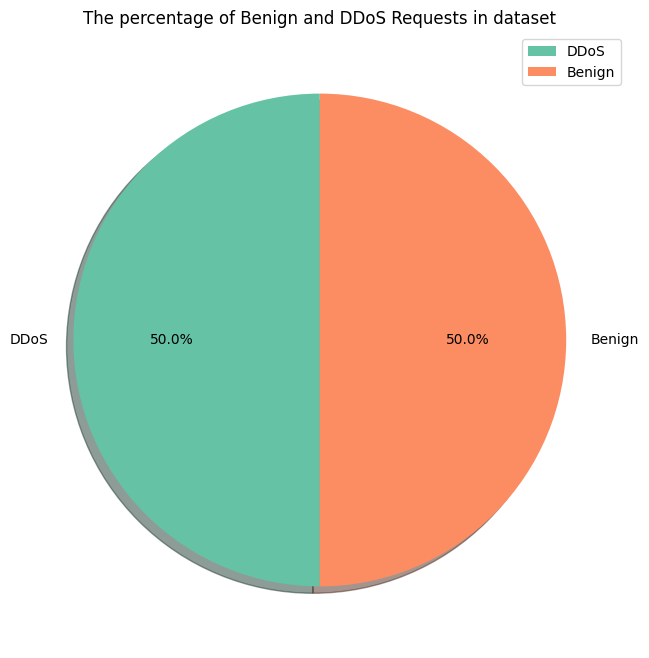

In [5]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

In [6]:
for i in df['Bwd Pkts/b Avg']:
    if i != 0:
        print("Fov")

# Переведем object в тип string и закодируем ip

In [7]:
import ipaddress                                                                   # converting the IP address form Strings to int

df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

df['Src IP'] = df['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst IP'] = df['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [8]:
df


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,3232236662,4504,3410565195,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,3232236662,4504,3410565195,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,3232236662,4505,3410565195,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,3232236662,4505,3410565195,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,3232236662,4506,3410565195,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279457,1725894,172.31.67.50-209.85.203.113-53598-80-6,3512060785,80,2887729970,53598,6,20/02/2018 05:14:52,50,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279458,5681778,172.31.69.17-108.174.10.14-54599-443-6,2887730449,54599,1823345166,443,6,20/02/2018 03:08:35,306,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279459,6395326,172.31.0.2-172.31.65.49-53-61087-17,2887729457,61087,2887712770,53,17,20/02/2018 01:03:19,362,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279460,4926899,172.31.0.2-172.31.67.58-53-61580-17,2887729978,61580,2887712770,53,17,20/02/2018 12:43:11,303,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


# Проверим наличие пропусков в датасете

In [9]:
g = df.isna().sum()
for col_name in g.index:  # Итерируем по названиям колонок
    if g[col_name] != 0:
        print("Найдено пропусков ", col_name, g[col_name])

Найдено пропусков  Flow Byts/s 3002


# Найдем столбцы столбцы с большим кол-во повторяющихся значений

In [10]:

rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.columns]
skewed = pd.DataFrame(frequency)

skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = skewed['col'].values
colsToDrop

array(['Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Cnt', 'URG Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'], dtype=object)

# Найдем столбцы с пропущенными значениями

In [11]:

del skewed
del rowbuilder
del frequency

missing = df.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df)*100}, index=df.columns)
missing
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values
dropnaCols, colsToDrop

(array(['Flow Byts/s'], dtype=object),
 array(['Bwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd PSH Flags',
        'Bwd Pkts/b Avg', 'Bwd URG Flags', 'FIN Flag Cnt',
        'Fwd Blk Rate Avg', 'Fwd Byts/b Avg', 'Fwd PSH Flags',
        'Fwd Pkts/b Avg', 'Fwd URG Flags', 'URG Flag Cnt'], dtype=object))

# Удалим столбцы с большим кол-во повторяющихся значений и с пропусками

In [12]:

df.drop(columns=colsToDrop, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)

print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 73 columns and 1276460 rows


# Удалим столбцы с бесконечными значениями


In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Шаг 2: Находим строки с бесконечными значениями в числовых столбцах
rows_with_inf = df[np.isinf(df[numeric_columns]).any(axis=1)]

# Шаг 3: Собираем имена столбцов, содержащих бесконечные значения
inf_subset = set()
for index, row in rows_with_inf.iterrows():
    for column_name, value in row[numeric_columns].items():  # Только числовые столбцы
        if np.isinf(value):  # Проверяем, является ли значение бесконечностью
            inf_subset.add(column_name)

inf_subset = list(inf_subset)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=inf_subset, how="all", inplace=True)
rows_with_inf = df[np.isinf(df[numeric_columns]).any(axis=1)]
colsToDrop = set([i for i in colsToDrop]) | set(inf_subset)

In [14]:
df.shape

(1274640, 73)

# Удалим возможные отрицательные значения (признаки приведенные ниже не могу быть отрицательными)


In [15]:
negValCols = ['Src IP', 'Dst IP', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Init Bwd Win Byts', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
print(colsToDrop)
negValCols = set(negValCols) - colsToDrop
print(negValCols)
for col in negValCols:
    if df[col].dtype in ['float64', 'int64']:
        df = df[df[col] >= 0]

{'Bwd Byts/b Avg', 'Bwd URG Flags', 'Fwd URG Flags', 'Flow Byts/s', 'Bwd Blk Rate Avg', 'Bwd PSH Flags', 'Bwd Pkts/b Avg', 'Fwd PSH Flags', 'URG Flag Cnt', 'Flow Pkts/s', 'Fwd Byts/b Avg', 'Fwd Blk Rate Avg', 'Fwd Pkts/b Avg', 'FIN Flag Cnt'}
{'Src IP', 'Bwd IAT Mean', 'Dst IP', 'Bwd IAT Tot', 'Bwd IAT Min', 'Flow IAT Min', 'Bwd IAT Max', 'Flow IAT Mean', 'Flow IAT Max', 'Init Bwd Win Byts'}


In [16]:
df.shape

(942124, 73)

# Опираясь на предметную область, выберем наиболее важные признаки

In [17]:
most_important_features = set([
    "Src IP",
    "Src Port",
    "Dst IP",
    "Dst Port",
    "Protocol",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "Fwd Pkt Len Max",
    "TotLen Fwd Pkts",
    "Fwd Seg Size Min",
    "Init Bwd Win Byts",
    "Bwd Pkt Len Std",
    "Flow Duration",
    "Fwd IAT Mean",
    "Flow IAT Min",
    "Bwd IAT Tot",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "PSH Flag Cnt",
    "Flow Pkts/s",
    "Flow Byts/s",
    "Label"])
droped_cols = set([i for i in colsToDrop]) | set(inf_subset)
colsToUse = list(most_important_features - droped_cols)
colsToUse

['Dst IP',
 'RST Flag Cnt',
 'Protocol',
 'Fwd Seg Size Min',
 'PSH Flag Cnt',
 'Fwd IAT Mean',
 'Src IP',
 'Bwd IAT Tot',
 'Fwd Pkt Len Max',
 'Bwd Pkt Len Std',
 'SYN Flag Cnt',
 'Dst Port',
 'Flow Duration',
 'Label',
 'Flow IAT Min',
 'Src Port',
 'TotLen Fwd Pkts',
 'Tot Bwd Pkts',
 'Tot Fwd Pkts',
 'Init Bwd Win Byts']

In [18]:
df = df[colsToUse]
df

,Dst IP,RST Flag Cnt,Protocol,Fwd Seg Size Min,PSH Flag Cnt,Fwd IAT Mean,Src IP,Bwd IAT Tot,Fwd Pkt Len Max,Bwd Pkt Len Std,SYN Flag Cnt,Dst Port,Flow Duration,Label,Flow IAT Min,Src Port,TotLen Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,Init Bwd Win Byts
0,3410565195,0,6,0,0,1.334052e+05,3232236662,3974862.0,86.0,372.027190,1,80,3974862,ddos,167.0,4504,86.0,44,29,5840
1,3410565195,0,6,0,0,0.000000e+00,3232236662,0.0,0.0,0.000000,0,80,63,ddos,63.0,4504,0.0,1,1,17520
2,3410565195,0,6,0,0,1.340000e+02,3232236662,476078.0,86.0,740.224403,1,80,476078,ddos,6.0,4505,86.0,6,2,5840
3,3410565195,0,6,0,0,1.450000e+02,3232236662,0.0,0.0,0.000000,0,80,151,ddos,6.0,4505,0.0,1,2,17520
4,3410565195,0,6,0,0,1.790000e+02,3232236662,472507.0,73.0,469.574275,1,80,472507,ddos,7.0,4506,73.0,5,2,5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279443,886021359,1,6,20,1,2.214005e+06,2887729715,20073175.0,703.0,656.620853,0,443,22140048,Benign,5.0,55791,1031.0,10,11,115
1279444,2852039166,1,6,20,1,5.054667e+03,2887729450,5635132.0,97.0,115.500000,0,80,5635269,Benign,12.0,49747,97.0,4,4,141
1279445,2887729196,0,6,20,1,1.541795e+05,3388172462,616745.0,140.0,62.753486,0,445,616798,Benign,53.0,50966,373.0,4,5,0
1279448,2887730185,0,6,20,1,3.802464e+05,3118348372,2565859.0,661.0,385.561279,0,3389,2661725,Benign,30.0,63347,1132.0,9,8,62868


In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for feature in df.columns: 
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=df, x=feature, kde=True, bins=30)
#     plt.title(f"Распределение {feature}")
#     plt.show()

# Расчитаем выбросы

In [20]:
import numpy as np
from robustats import medcouple

def adjusted_boxplot(data):
    data = np.array(data, dtype=np.float64)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    mc = medcouple(data)  # Медианный коэффициент асимметрии
    
    # Корректировка границ
    if mc >= 0:
        lower_bound = q1 - 1.5 * np.exp(-4 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(3 * mc) * iqr
    else:
        lower_bound = q1 - 1.5 * np.exp(-3 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(4 * mc) * iqr
    
    return lower_bound, upper_bound

# Пример для признака 'Tot Fwd Pkts'

def outliers_iqr(data, coef=4):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - coef * iqr
    upper_bound = q3 + coef * iqr
    return lower_bound, upper_bound

def outliers(df, feature):
    if df[feature].dtype in ["float64", "int64"] and feature not in set(["Label", "Src Port", "Src IP", "Dst IP"]):
        main_data = df[df[feature] > 0][feature]
        soft_upper = main_data.quantile(0.95)  # Верхние 1% считаем выбросами
        extreme_mask = (df[feature] > soft_upper)
        df[feature] = np.where(extreme_mask, soft_upper, df[feature])  # Winsorization

# Выберем подвыборку для GNB и для random forest

In [21]:
df_forest = df.copy()
df_gaus = df.copy()
df_gaus.drop(columns=['Label', 'Src Port', 'Src IP', 'Dst IP'])

for feature in df_gaus.columns:
    outliers(df_gaus, feature)
    print(len(df_gaus))


942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124
942124


In [22]:
df_gaus.shape

(942124, 20)

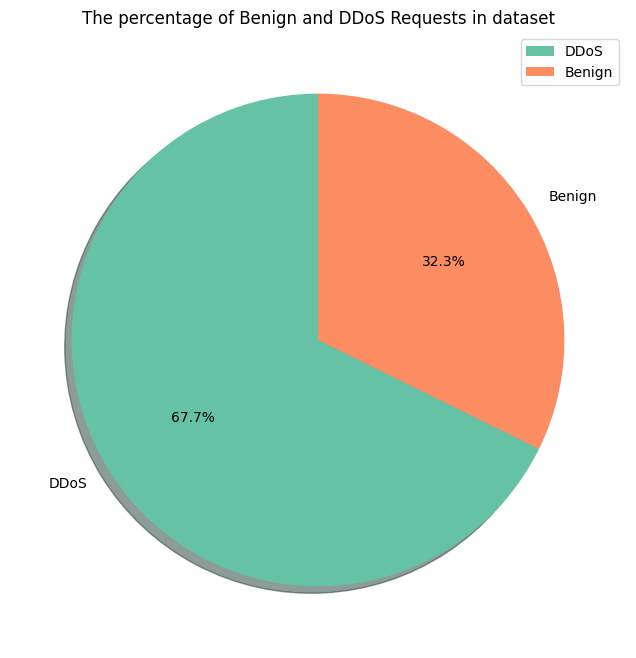

In [23]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

# Возпользуемся GNB классификатором

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score


Y = df_gaus['Label']  
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)  
X = df_gaus.drop(columns=['Label'])  

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44  
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

classifier = GaussianNB(priors=[0.5, 0.5])
classifier.fit(X_train_scaled, y_train)

y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_test)))

Training-set accuracy score: 0.9693
Test-set accuracy score: 0.9702
Precision score: 0.9879
Recall score: 0.9679


# Используем случайный лес

# Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [50, 100, 200],
    'max_features': ['sqrt'],
    'class_weight': ['balanced'],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
)

grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.3f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))